In [1]:
## Andreas Fahey - G00346830

In [2]:
## Project - Training a Model

In [1]:
import keras as kr
import numpy as np
import matplotlib.pyplot as plt
import gzip
import matplotlib
matplotlib.use('agg')

## keras imports for dataset for Neural Network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

Using TensorFlow backend.


In [2]:
## Load the MNIST Dataset
## This function splits the dataset into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

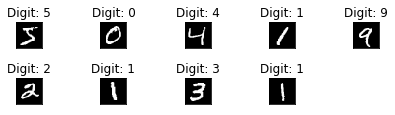

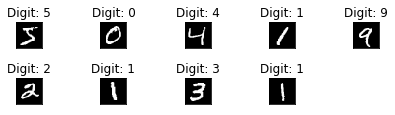

In [3]:
## Test Example
fig = plt.figure()
for i in range(9):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
fig

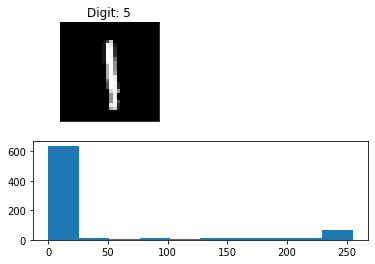

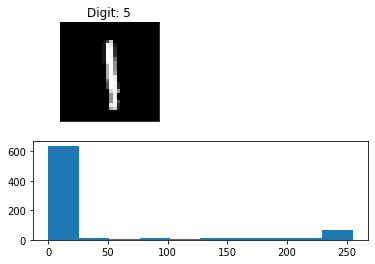

In [4]:
## Length must be 28*28=784 
fig = plt.figure()
plt.subplot(2,2,1)
plt.imshow(X_train[i], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
fig

In [6]:
## Print Shape
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

## Build input vector (28x28=784)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Normalising data
X_train /= 255
X_test /= 255

## Print Input Shape
print("Train Shape", X_train.shape)
print("Test Shape", X_test.shape)

X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)
Train Shape (60000, 784)
Test Shape (10000, 784)


In [7]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [8]:
##  Encoding Using Keras Numpy Utils
n_classes = 10
print("Shape before Encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after Encoding", Y_train.shape)

Shape before Encoding:  (60000,)
Shape after Encoding (60000, 10)


In [9]:
## Build linear stack of layers with Sequential Model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [10]:
## Compiling and Training The Model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 6s - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0678 - val_accuracy: 0.9820
Epoch 2/20
 - 6s - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0685 - val_accuracy: 0.9820
Epoch 3/20
 - 6s - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0680 - val_accuracy: 0.9818
Epoch 4/20
 - 6s - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0627 - val_accuracy: 0.9823
Epoch 5/20
 - 6s - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0725 - val_accuracy: 0.9823
Epoch 6/20
 - 6s - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0714 - val_accuracy: 0.9824
Epoch 7/20
 - 7s - loss: 0.0140 - accuracy: 0.9951 - val_loss: 0.0719 - val_accuracy: 0.9826
Epoch 8/20
 - 6s - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0672 - val_accuracy: 0.9835
Epoch 9/20
 - 6s - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0679 - val_accuracy: 0.9829
Epoch 10/20
 - 6s - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.0755 - val_accuracy: 0.9819
Epoch 11/20
 - 6s -

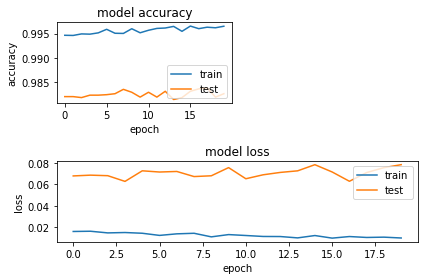

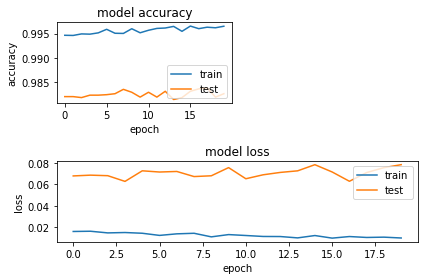

In [13]:
## Training Model 
## Saving the Metrics
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

## Saving my Model
save_dir = "savedModel/"
model_name = 'trainedModel.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved Model at %s ' % model_path)

## Plotting Metrics
fig = plt.figure()
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig